In [1]:
from google.colab import files
uploaded = files.upload()

Saving texts_merged_dataset_enriched.csv to texts_merged_dataset_enriched.csv


In [3]:
import pandas as pd
df = pd.read_csv('texts_merged_dataset_enriched.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,text,generated,source,punctuations_nb,neg_sentiment_polarity,pos_sentiment_polarity,text_corrections_nb,text_repetitions_nb,...,text_lenght,repetitions_ratio,punctuations_ratio,text_corrections_ratio,text_corrections_set_ratio,average_neg_sentiment_polarity,average_sentence_lenght,number_of_tests,number_of_correct_prediction,pourcentage_of_correct_prediction
0,0,756013,"Furthermore, the additional hours spent in sch...",1.0,huggingface.co_human_ai_generated_text/model_t...,24,-0.231250,0.685417,1,59,...,1313,0.044935,0.018279,0.000762,0.125000,-0.000176,164.125000,87,87,68
1,1,944797,other student have their young ones at home wh...,0.0,huggingface.co_human_ai_generated_text/model_t...,25,-2.522396,0.025000,15,181,...,2594,0.069776,0.009638,0.005783,1.363636,-0.000972,235.818182,118,118,42
2,2,474092,Always set a goal for yourself.\n\nEveryone in...,0.0,huggingface.co_human_ai_generated_text/model_t...,31,-0.385417,2.637662,15,130,...,2061,0.063076,0.015041,0.007278,0.750000,-0.000187,103.050000,79,79,51
3,3,841077,"Additionally, online classes often provide add...",1.0,huggingface.co_human_ai_generated_text/model_t...,32,-0.062500,3.295556,3,86,...,1871,0.045965,0.017103,0.001603,0.230769,-0.000033,143.923077,121,121,78
4,4,289166,Cars have bin around for awhile and this have ...,0.0,kaggle-ai-generated-vs-human-text/AI_Human.csv,83,-0.984722,3.189759,38,179,...,3100,0.057742,0.026774,0.012258,1.357143,-0.000318,110.714286,177,177,41


In [4]:
import gc
gc.collect()

0

In [5]:
# Correct column selection syntax
df = df[['text', 'generated']]

# Save the new dataset to a CSV file in the Colab environment
df.to_csv('/content/new_dataset.csv', index=False)

# Display the first few rows of the new dataset to confirm
print(df.head())
df.shape

                                                text  generated
0  Furthermore, the additional hours spent in sch...        1.0
1  other student have their young ones at home wh...        0.0
2  Always set a goal for yourself.\n\nEveryone in...        0.0
3  Additionally, online classes often provide add...        1.0
4  Cars have bin around for awhile and this have ...        0.0


(4670, 2)

In [ ]:
from google.colab import files
files.download('/content/new_dataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [6]:
df = df.sample(frac=1).reset_index(drop=True)

In [7]:
!pip install pyspellchecker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 65.6 MB/s eta 0:00:00


In [8]:
!pip install readability-lxml

In [9]:
!pip install textstat

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 79.9 MB/s eta 0:00:00


In [10]:

# Core Libraries
import numpy as np
import pandas as pd

# Text and NLP Libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import spacy
import textstat
from textblob import TextBlob
from transformers import pipeline

# Advanced Libraries for Word Embeddings and Semantic Analysis
from sentence_transformers import SentenceTransformer, util

# For Topic Modeling
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# NLTK data downloads
nltk.download('stopwords')
nltk.download('punkt')

# Load Spacy model for NLP
nlp = spacy.load("en_core_web_sm")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


# Text-Based Features
Text-based features provide basic insights into the structure and composition of each text, such as word count, sentence count, and stopword usage.

Libraries in use : Natural Language Toolkit (NLTK)

- Word Count: Calculates the total number of words in each text by tokenizing the text with word_tokenize().
This gives an insight into the length and verbosity of the text.

- Sentence Count: Uses sent_tokenize() to count the number of sentences in each text. This helps understand the sentence structure and complexity.

- Average Word Length: Computes the average length of words in each text. This provides information on the complexity of vocabulary used.

- Stopwords Count: Counts the number of stopwords in each text using the NLTK English stopwords list. Stopwords are commonly used words (like “the”, “and”) that may not carry significant meaning on their own.


    

In [11]:
def text_based_features(text_df, text_column='text'):
    features = pd.DataFrame()

    # Word count,
    features['word_count'] = text_df[text_column].apply(lambda x: len(word_tokenize(x))) # using functional programming

    # Sentence count
    features['sentence_count'] = text_df[text_column].apply(lambda x: len(sent_tokenize(x)))

    # Average word length
    features['avg_word_length'] = text_df[text_column].apply(lambda x: np.mean([len(word) for word in word_tokenize(x)]))

    # Stopwords count
    features['stopwords_count'] = text_df[text_column].apply(lambda x: sum([1 for word in word_tokenize(x) if word.lower() in stopwords.words('english')]))#  list comprehension

    return features

# Lexical Diversity and Readability Scores

Libraries in use : NLTK--> tokenization, Textstast--> calculate scores: built -in fucntions

Lexical diversity measures the variety of words in text, indicating richness in vocabulary, while readability scores assess how easy a text is to read. Readability metrics such as the Flesch Reading Ease and Dale-Chall Score are used.
Key Concepts

- Lexical Diversity: Measures the variety of words in a text.
    A higher lexical diversity means a richer vocabulary, while a lower one suggests repetitive or simpler language.
- Readability Scores: These scores quantify how easy or difficult it is to read a given text.
    Higher scores generally indicate simpler texts, while lower scores imply more complex language.

	• Flesch Reading Ease: A higher score --> simpler text, easy to read

	• SMOG Index: Measures the years of education needed to understand a piece of writing. B)

	• Flesch-Kincaid Grade Level: Indicates the U.S. school grade level required to understand the text.



In [12]:
def lexical_diversity_readability(text_df, text_column='text'):
    features = pd.DataFrame()

    # Lexical diversity (Unique words / Total words)
    features['lexical_diversity'] = text_df[text_column].apply(lambda x: len(set(word_tokenize(x))) / len(word_tokenize(x)) if len(word_tokenize(x)) > 0 else 0)

    # Readability Scores
    features['flesch_reading_ease'] = text_df[text_column].apply(textstat.flesch_reading_ease)
    features['smog_index'] = text_df[text_column].apply(textstat.smog_index)
    features['flesch_kincaid_grade'] = text_df[text_column].apply(textstat.flesch_kincaid_grade)

    return features

# POS Tagging Features
Part of Speech (POS) tagging helps identify grammatical structures in text, such as noun and verb counts. By examining POS distributions, we can highlight stylistic differences that may distinguish AI-generated text from human-generated text.

Libraries in use: SpaCy (nlp): Used for natural language processing, specifically to tokenize text and retrieve POS tags.



In [13]:
def pos_tagging_features(text_df, text_column='text'):
    pos_features = pd.DataFrame()

    def pos_counts(text):
        doc = nlp(text) # text parsing
        pos_counts = {token.pos_: 0 for token in doc} # dictionary with POS tags (like NOUN, VERB, ADJ)
        for token in doc:
            pos_counts[token.pos_] += 1
        return pos_counts

    pos_df = text_df[text_column].apply(pos_counts).apply(pd.Series).fillna(0) # Fill missing POS tag counts with 0 for consistency across texts

    pos_df.columns = [f'pos_{col}' for col in pos_df.columns]
    pos_features = pd.concat([pos_features, pos_df], axis=1)

    return pos_features

# Sentiment and Emotion Analysis

Sentiment and emotion analysis capture the emotional tone of the text, identifying positive, negative, or neutral sentiment and specific emotions.

Libraries in use :
1.	Hugging Face Transformers:
- Function: Provides a pre-trained pipeline for sentiment analysis.
- Usage in Code: pipeline('sentiment-analysis', truncation=True, max_length=512)
-Purpose: To analyze text and classify it as positive, negative, or neutral using a transformer model.

2.	TextBlob:
- Function: Offers tools for natural language processing, specifically sentiment analysis.
- Usage in Code: TextBlob(x).sentiment.polarity and TextBlob(x).sentiment.subjectivity

- Sentiment (Transformers): General sentiment (POSITIVE, NEGATIVE, NEUTRAL)
- Polarity (TextBlob): Degree of positivity or negativity, from -1 to 1. Hope has 1 polarity, terrible -1
- Subjectivity (TextBlob): Extent of personal opinion, from 0 to 1. " I think" --> 1

In [14]:
def sentiment_emotion_features(text_df, text_column='text'):
    features = pd.DataFrame()

    # Initialize sentiment analysis pipeline with GPU (device=0)
    sentiment_pipeline = pipeline('sentiment-analysis', device=0, truncation=True, max_length=512)

    # Apply sentiment analysis in batches
    texts = text_df[text_column].tolist()
    sentiment_results = sentiment_pipeline(texts, truncation=True, max_length=512, batch_size=32)

    # Extract sentiment labels from the results
    features['sentiment'] = [result['label'] for result in sentiment_results]

    # Polarity and subjectivity from TextBlob
    features['polarity'] = text_df[text_column].apply(lambda x: TextBlob(x).sentiment.polarity)
    features['subjectivity'] = text_df[text_column].apply(lambda x: TextBlob(x).sentiment.subjectivity)

    return features

# N-grams and Keyword Features
N-grams and keyword features provide insights into common phrases and important keywords, which can distinguish between human and AI-generated texts.

Libraries in Use:
- Sklearn’s CountVectorizer: Used for extracting n-grams (bigrams and trigrams) from the text and counting their occurrences.

N-gram : sequence of n adjancent words in a sentence,
- Ex: “The product is great,” the bigrams are:
"The product” - "product is" -  "product is great"
- “Humans and AI can collaborate.” the triagrams

In [15]:
def ngrams_keyword_features(text_df, text_column='text'):
    features = pd.DataFrame()

    # Bi-grams count
    vectorizer = CountVectorizer(ngram_range=(2, 2))
    bigram_matrix = vectorizer.fit_transform(text_df[text_column])
    features['bigram_count'] = bigram_matrix.sum(axis=1).A1

    # Trigrams count
    vectorizer = CountVectorizer(ngram_range=(3, 3))
    trigram_matrix = vectorizer.fit_transform(text_df[text_column])
    features['trigram_count'] = trigram_matrix.sum(axis=1).A1 # .A1 converts the sparse column vector into a 1-d np array, to work with pd df columns.

    return features

# Linguistic Complexity Features

These features analyze the complexity of sentences, including the number of clauses and the depth of syntactic structures.
- Dependency structures : its like parts of the sentence that helps to make sense, like names of people, places, or things being talked about.

- " The dog runs”...low complexity, entities : none, dependency count 0
- " Jerome is a french experienced ios developer " ...high complexity, entities: 3 , count dependency = 3

Libraries in use : 	SpaCy: NLP library, to perform dependency parsing. The **ents** attribute in SpaCy identifies entities in the text, which can act as a proxy to understand the text’s syntactic structure. Uses Named Entity Recognition (NER), to define Entities : “real-world objects” in texts...


In [16]:
# Load SpaCy's English model with only NER (for named entity recognition)
nlp = spacy.load("en_core_web_sm", disable=["tagger", "parser", "lemmatizer"])

def linguistic_complexity_features(text_df, text_column='text'):
    features = pd.DataFrame()

    # Process text in batches to improve efficiency
    docs = nlp.pipe(text_df[text_column], batch_size=32)  # Adjust batch size as needed for performance
    features['dependency_count'] = [len(doc.ents) for doc in docs]

    return features

/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


# BERT Word Embedding Features

Embedding features represent text as vectors in a high-dimensional space, capturing nuanced meanings.
The embedding function converts each text sample into a 384-dimensional vector using SBERT embeddings.
- Each dimension of this vector captures some aspect of the text’s meaning, position in semantic space, or relationship with other words or phrases.
- every column in the output represents a unique embedding feature (e.g., embedding_0, embedding_1, …, embedding_383), and together they provide a rich, high-dimensional representation of the text.
- (384) is predefined by the model architecture

In [17]:
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
import torch

# Define the function for generating BERT embeddings with optional PCA
def embedding_features_with_pca(text_df, text_column='text', n_components=50):
    # Initialize an empty DataFrame to store the features
    features = pd.DataFrame()

    # Generate embeddings using SBERT
    model = SentenceTransformer('all-MiniLM-L6-v2', device='cuda')  # Using GPU for speed
    embeddings = text_df[text_column].apply(lambda x: model.encode(x)).tolist()

    # Convert embeddings to a DataFrame
    embedding_df = pd.DataFrame(embeddings)
    embedding_df.columns = [f'embedding_{i}' for i in range(embedding_df.shape[1])]
    features = pd.concat([features, embedding_df], axis=1)

    # Apply PCA to reduce dimensions
    pca = PCA(n_components=n_components)
    reduced_embeddings = pca.fit_transform(embedding_df)

    # Convert PCA output to DataFrame and add to features
    pca_df = pd.DataFrame(reduced_embeddings, columns=[f'pca_embedding_{i}' for i in range(n_components)])
    features = pd.concat([features, pca_df], axis=1)

    return features

# Semantic Similarity

Cosine similarity is a method to measure how alike two texts are, regardless of length. It looks at the “angle” between them in a high-dimensional space—if the angle is small, they’re similar. the “angle” between the text and its reference.

- pre-trained SBERT model converts sentences into dense vector representations (embeddings) that capture the semantic meaning.
- example : A = “AI is transforming industries.”, B is a " reference text"
- semantic_ similarity =
Cosine similarity between two vectors \( A \) and \( B \) is defined as:

$$
\text{cosine\_similarity} = \cos(\theta) = \frac{{A \cdot B}}{{\|A\| \|B\|}} = \frac{{\sum_{i=1}^{n} A_i B_i}}{{\sqrt{\sum_{i=1}^{n} A_i^2} \cdot \sqrt{\sum_{i=1}^{n} B_i^2}}}
$$



Note: I need to create a reference text, it must be a commun theme of type of language across the dataset as a benchmark. Challenge: if we make an hybrid dataset, themes are mixed which make difficult to find a reference text...
- strategy 1: maybe using a K-means on the text embeddings to group similar texts,...
- strategy 2 : pick randomly one text and run the function against...

steps:

1. Cluster the Data: Use K-means to create two clusters, one for AI-generated and one for human-generated text.

2. Select Reference Texts: Identify the reference text closest to the centroid for each cluster.

3. Calculate Similarity: For each text, calculate the similarity to the reference text of its respective cluster.




In [18]:
# Strategy 1 : k-means on embedding to find clusters

from sklearn.cluster import MiniBatchKMeans

def find_reference_texts_with_kmeans(df, text_column='text', num_clusters=2, n_components=50):
    # Get reduced embeddings
    embeddings_reduced = embedding_features_with_pca(df, text_column=text_column, n_components=n_components)

    # Run MiniBatchKMeans for faster clustering
    kmeans = MiniBatchKMeans(n_clusters=num_clusters, random_state=42, batch_size=100)
    cluster_labels = kmeans.fit_predict(embeddings_reduced)

    # Identify Reference Texts
    reference_texts = []
    for i in range(num_clusters):
        # Get indices for each cluster
        cluster_indices = [index for index, label in enumerate(cluster_labels) if label == i]
        cluster_embeddings = embeddings_reduced.iloc[cluster_indices]

        # Calculate centroid of the cluster
        centroid_embedding = kmeans.cluster_centers_[i]

        # Find the closest text to the centroid within the cluster
        similarities = util.cos_sim(torch.tensor(cluster_embeddings.values), torch.tensor(centroid_embedding)).numpy()
        closest_idx = similarities.argmax()
        reference_texts.append(df.iloc[cluster_indices[closest_idx]][text_column])

    return reference_texts, cluster_labels  # Return cluster labels for use in cosine similarity calculation

In [19]:
from sentence_transformers import util

def cosine_similarity_features(text_df, cluster_labels, reference_texts, text_column='text'):
    features = pd.DataFrame()
    similarities = []

    # Display reference texts for each cluster (AI and human)
    for i, text in enumerate(reference_texts):
        print(f"Cluster {i + 1} Reference Text (AI or Human):\n{text}\n")

    # Calculate similarity for each text to the reference text of its cluster
    model = SentenceTransformer('all-MiniLM-L6-v2', device='cuda')
    for idx, text in enumerate(text_df[text_column]):
        cluster_label = cluster_labels[idx]  # Get the cluster label for the text
        reference_text = reference_texts[cluster_label]  # Get the reference text for that cluster

        # Encode both the text and reference text
        reference_embedding = model.encode(reference_text)
        text_embedding = model.encode(text)

        # Calculate cosine similarity between text embedding and reference embedding
        similarity = util.cos_sim(text_embedding, reference_embedding).item()
        similarities.append(similarity)

    features['semantic_similarity'] = similarities
    return features

# Structural and Formatting Features
Capture line breaks, indentation, or special formatting often present in human-written text.

Human texts often have structured paragraphing and a varied use of punctuation for emphasis and clarity...

In [20]:
def structural_formatting_features(text_df, text_column='text'):
    features = pd.DataFrame()

    # Line break count
    features['line_break_count'] = text_df[text_column].apply(lambda x: x.count('\n'))

    # Punctuation count
    features['punctuation_count'] = text_df[text_column].apply(lambda x: sum([1 for char in x if char in '.,;!?']))

    return features

In [21]:
def instruction_based_features(text_df, text_column='instructions'):
    features = pd.DataFrame()

    # Instruction word count
    features['instruction_word_count'] = text_df[text_column].apply(lambda x: len(word_tokenize(x)) if pd.notna(x) else 0)

    return features

# Topic Modeling Features

The topic_modeling_features function target to identify latent themes in the text by using topic modeling. This method provides insights into the primary subjects discussed in the text and assigns each text sample a probability distribution across a set number of topics.

Libraries in use:
- Scikit-Learn: For CountVectorizer to create a document-term matrix.
- Scikit-Learn LatentDirichletAllocation (LDA): For topic modeling, to capture underlying topics in the text.


CountVectorizer:
- Transforms text into a document-term matrix.
- max_df=0.95: Ignores terms that appear in more than 95% of the documents (common words that may not contribute to topic distinction).
- min_df=2: Ignores terms that appear in fewer than 2 documents (rare words).

Latent Dirichlet Allocation (LDA):
- Creates an instance of the LDA model with n_topics as the number of topics.
- n_topics=5 means the function will attempt to identify 5 distinct topics
- Fits the LDA model on the document-term matrix, learning the probability distribution of terms across topics.


Note: Maybe when using a bigger dataset, i should find topics for each ...not clear yet...


In [22]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer


def topic_modeling_features(text_df, text_column='text', n_topics=6, max_features=5000):
    features = pd.DataFrame()

    # Vectorize the text data with fewer terms
    vectorizer = CountVectorizer(max_df=0.8, min_df=5, stop_words='english', max_features=max_features)
    doc_term_matrix = vectorizer.fit_transform(text_df[text_column])

    # Fit the LDA model with a smaller document-term matrix
    lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
    lda.fit(doc_term_matrix)

    # Transform the document-term matrix to topic distribution
    topic_values = lda.transform(doc_term_matrix)
    topic_df = pd.DataFrame(topic_values, columns=[f'topic_{i}' for i in range(n_topics)])

    features = pd.concat([features, topic_df], axis=1)

    return features

# Repetition Detection Function
This function will calculate the frequency of repeated phrases or words. We’ll use Counter from the collections module to count repeated words or phrases in the text.

In [23]:
from collections import Counter
import pandas as pd

def repetition_features(text_df, text_column='text', n=2):
    features = pd.DataFrame()

    def detect_repetition(text):
        words = text.split()
        phrases = [' '.join(words[i:i+n]) for i in range(len(words) - n + 1)]
        phrase_counts = Counter(phrases)
        repeated_phrases = {phrase: count for phrase, count in phrase_counts.items() if count > 1}
        return len(repeated_phrases)  # count of unique repeated phrases

    features['repetition_count'] = text_df[text_column].apply(detect_repetition)

    return features

# Error-Checking Function Using TextBlob

In [24]:
from spellchecker import SpellChecker


def spelling_error_features(text_df, text_column='text'):
    features = pd.DataFrame()
    spell = SpellChecker()

    def count_spelling_errors(text):
        # Tokenize the text by splitting it into words
        words = text.split()
        # Identify misspelled words
        misspelled_words = spell.unknown(words)
        # The count of spelling errors is the number of unique misspelled words
        return len(misspelled_words)

    features['spelling_errors'] = text_df[text_column].apply(count_spelling_errors)

    return features

In [25]:
# Calling internal features
text_features = text_based_features(df, text_column='text')

In [26]:
lexical_features = lexical_diversity_readability(df, text_column='text')

In [27]:
pos_features = pos_tagging_features(df, text_column='text')

In [28]:
sentiment_features = sentiment_emotion_features(df, text_column='text')

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [29]:
ngram_features = ngrams_keyword_features(df, text_column='text')

In [30]:
complexity_features = linguistic_complexity_features(df, text_column='text')

In [31]:
structural_features = structural_formatting_features(df, text_column='text')

In [32]:
repetition_features = repetition_features(df, text_column='text')

In [33]:
spelling_error_features = spelling_error_features(df, text_column='text')

In [34]:

# Concatenate internal features
internal_features = pd.concat([
    text_features,
    lexical_features,
    pos_features,
    sentiment_features,
    ngram_features,
    complexity_features,
    structural_features,
    repetition_features,
    spelling_error_features
], axis=1)

In [42]:
internal_df = pd.concat([df[['generated', 'text']], internal_features], axis=1)
internal_df.shape


(4670, 22)

In [43]:
internal_df.to_csv('internal_df.csv', index=False)

In [44]:
from google.colab import files

# Download the internal features dataset
files.download('internal_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [45]:
# Calling external features
embedding_features_df = embedding_features_with_pca(df, text_column='text')

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [46]:
topic_features = topic_modeling_features(df, text_column='text', n_topics=5)

In [47]:
reference_texts, cluster_labels = find_reference_texts_with_kmeans(df, text_column='text')

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [48]:
semantic_features = cosine_similarity_features(df, cluster_labels, reference_texts, text_column='text')

Cluster 1 Reference Text (AI or Human):
It can also open doors to many educational and professional opportunities that we may not have been able to pursue otherwise. 

Finally, valuing our individual identities and successes can make us all the more valuable in any team environment. 
In a world filled with countless sources of advice, it can be difficult to remain true to ourselves. By working individually and finding the courage to be true to ourselves, we can truly make a positive impact on the people and world around us.. After all, our unique perspectives and abilities can create synergy and bring success to any group. It is so easy to conform to societal norms and expectations, and there is often a subtle, yet relentless, pressure to do so. Furthermore, taking the time to engage in personal development activities can help us become more confident in our abilities and cultivate a better sense of self. Through self-reflection and personal assessment, we can gain a better understandi

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [54]:
# Generate Internal and External Datasets
internal_df = pd.concat([df, internal_features], axis=1)
external_df = pd.concat([df, external_features], axis=1)

# Display the internal and external DataFrames for verification
print("Internal Features Dataset:")
display(internal_df.head())
print(internal_df.shape)
print(internal_df.columns)



Internal Features Dataset:


,text,generated,word_count,sentence_count,avg_word_length,stopwords_count,lexical_diversity,flesch_reading_ease,smog_index,flesch_kincaid_grade,...,sentiment,polarity,subjectivity,bigram_count,trigram_count,dependency_count,line_break_count,punctuation_count,repetition_count,spelling_errors
0,As Winston Churchill put it: “Success is not f...,1.0,305,14,4.406557,130,0.501639,64.10,11.0,8.2,...,POSITIVE,0.055080,0.471836,262,261,5,7,30,22,35
1,to show a society how strongly we trust our se...,0.0,701,54,3.507846,372,0.262482,93.14,6.8,3.3,...,NEGATIVE,0.130804,0.529211,599,598,1,12,71,70,48
2,It also opens up the possibility of thinking b...,1.0,195,9,4.692308,78,0.610256,45.05,13.3,11.4,...,POSITIVE,0.228545,0.576909,171,170,0,5,16,10,16
3,Always doing something in sports allows you to...,0.0,482,21,3.556017,263,0.348548,85.02,7.3,6.4,...,POSITIVE,0.156250,0.508958,412,411,4,6,42,49,32
4,Do you think it would be easier FOF technology...,0.0,262,10,4.305344,96,0.572519,56.49,12.7,11.1,...,NEGATIVE,0.130978,0.348913,222,221,19,6,23,9,33


(4670, 22)
Index(['text', 'generated', 'word_count', 'sentence_count', 'avg_word_length',
       'stopwords_count', 'lexical_diversity', 'flesch_reading_ease',
       'smog_index', 'flesch_kincaid_grade', 'pos_', 'pos_SPACE', 'sentiment',
       'polarity', 'subjectivity', 'bigram_count', 'trigram_count',
       'dependency_count', 'line_break_count', 'punctuation_count',
       'repetition_count', 'spelling_errors'],
      dtype='object')


In [55]:
# Unique values for each column individually
print("Sentiment Labels:", internal_df['sentiment'].unique())


Sentiment Labels: ['POSITIVE' 'NEGATIVE']


# Aggregated Internal Features

In [64]:
def aggregate_internal_features(internal_df):
    aggregated_features = pd.DataFrame()

    # 1. Ratios for Counts
    # Ratios that make sense relative to word_count or sentence_count
    aggregated_features['word_count_ratio'] = internal_df['word_count'] / internal_df['sentence_count']
    aggr

    aggregated_features['stopwords_ratio'] = internal_df['stopwords_count'] / internal_df['word_count']
    aggregated_features['punctuation_ratio'] = internal_df['punctuation_count'] / internal_df['word_count']

    aggregated_features['line_break_ratio'] = internal_df['line_break_count'] / internal_df['sentence_count']
    aggregated_features['repetition_ratio'] = internal_df['repetition_count'] / internal_df['word_count']
    aggregated_features['bigram_count_ratio'] = internal_df['bigram_count'] / internal_df['word_count']
    aggregated_features['trigram_count_ratio'] = internal_df['trigram_count'] / internal_df['word_count']
    aggregated_features['dependency_ratio'] = internal_df['dependency_count'] / internal_df['sentence_count']
    aggregated_features['spelling_errors_ratio'] = internal_df['spelling_errors'] / internal_df['word_count']

    # 2. POS Tag Ratios
    pos_columns = [col for col in internal_df.columns if 'pos_' in col]
    for pos_col in pos_columns:
        aggregated_features[f'{pos_col}_ratio'] = internal_df[pos_col] / internal_df['word_count']

    # 3. Direct Inclusion of Features (as-is)
    # Keep features that don't require ratios or are already averages or normalized
    retained_features = internal_df[[
        'avg_word_length',
        'lexical_diversity',
        'flesch_reading_ease',
        'smog_index',
        'flesch_kincaid_grade',
        'polarity',
        'subjectivity',
        'sentiment'
    ]].copy()

    # Combine aggregated ratios and retained features
    final_internal_features = pd.concat([df[['generated', 'text']],aggregated_features, retained_features], axis=1)

    return final_internal_features

In [82]:
# Generate the aggregated internal features
internal_aggregated = aggregate_internal_features(internal_df)



In [83]:
internal_aggregated.head()

,generated,text,word_count_ratio,sentence_count_ratio,stopwords_ratio,punctuation_ratio,sentence_word_ratio,line_break_ratio,repetition_ratio,bigram_count_ratio,...,pos__ratio,pos_SPACE_ratio,avg_word_length,lexical_diversity,flesch_reading_ease,smog_index,flesch_kincaid_grade,polarity,subjectivity,sentiment
0,1.0,As Winston Churchill put it: “Success is not f...,21.785714,0.045902,0.426230,0.098361,0.045902,0.500000,0.072131,0.859016,...,1.006557,0.013115,4.406557,0.501639,64.10,11.0,8.2,0.055080,0.471836,POSITIVE
1,0.0,to show a society how strongly we trust our se...,12.981481,0.077033,0.530670,0.101284,0.077033,0.222222,0.099857,0.854494,...,0.998573,0.009986,3.507846,0.262482,93.14,6.8,3.3,0.130804,0.529211,NEGATIVE
2,1.0,It also opens up the possibility of thinking b...,21.666667,0.046154,0.400000,0.082051,0.046154,0.555556,0.051282,0.876923,...,1.010256,0.015385,4.692308,0.610256,45.05,13.3,11.4,0.228545,0.576909,POSITIVE
3,0.0,Always doing something in sports allows you to...,22.952381,0.043568,0.545643,0.087137,0.043568,0.285714,0.101660,0.854772,...,1.000000,0.006224,3.556017,0.348548,85.02,7.3,6.4,0.156250,0.508958,POSITIVE
4,0.0,Do you think it would be easier FOF technology...,26.200000,0.038168,0.366412,0.087786,0.038168,0.600000,0.034351,0.847328,...,1.000000,0.011450,4.305344,0.572519,56.49,12.7,11.1,0.130978,0.348913,NEGATIVE


In [84]:
internal_aggregated.to_csv('internal_aggregated.csv', index=False)

In [86]:
# Convert 'sentiment' to numeric format
internal_aggregated['sentiment_numeric'] = internal_df['sentiment'].map({'NEGATIVE': 0, 'POSITIVE': 1})

# Verify that the column is added
print(internal_aggregated[['sentiment', 'sentiment_numeric']].head())

  sentiment  sentiment_numeric
0  POSITIVE                  1
1  NEGATIVE                  0
2  POSITIVE                  1
3  POSITIVE                  1
4  NEGATIVE                  0


In [87]:
from google.colab import files
files.download('internal_aggregated.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

  sentiment  sentiment_numeric
0  POSITIVE                  1
1  NEGATIVE                  0
2  POSITIVE                  1
3  POSITIVE                  1
4  NEGATIVE                  0


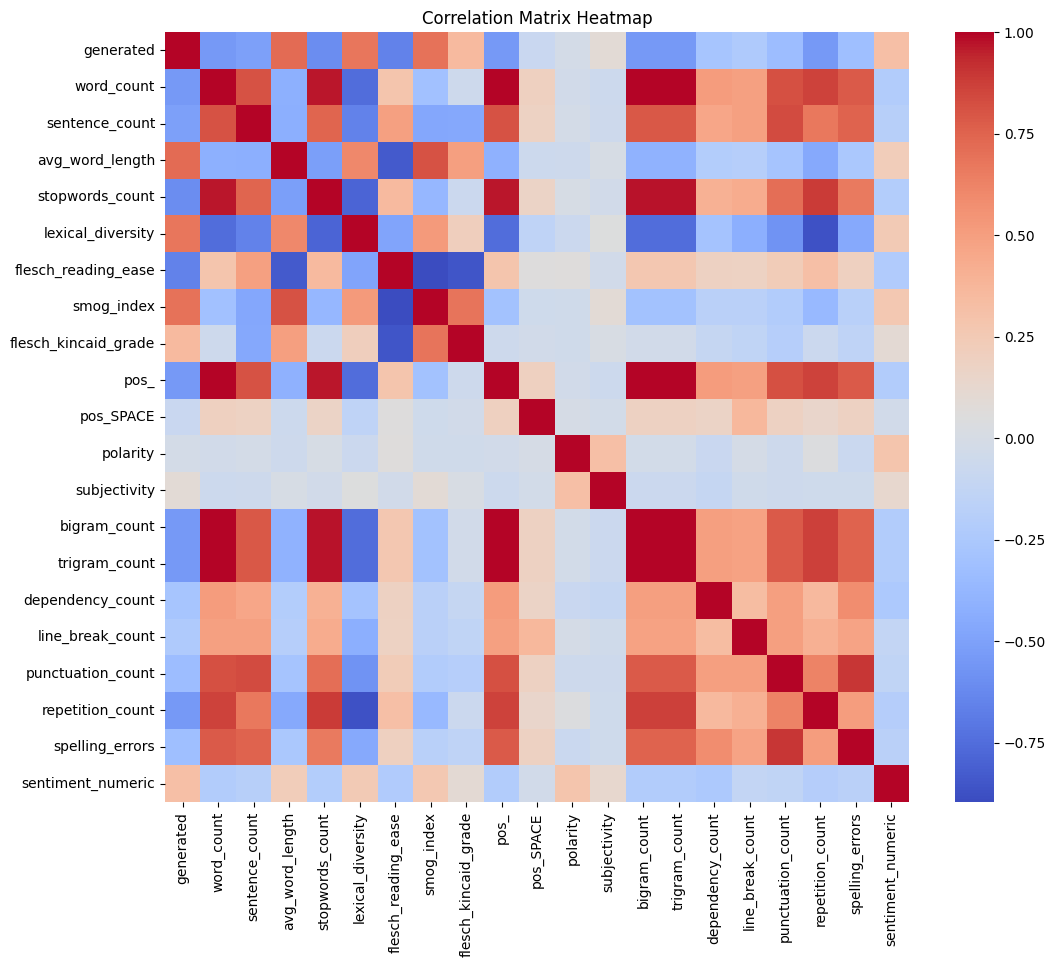


Correlation with 'generated' column:
 generated               1.000000
avg_word_length         0.722652
smog_index              0.690975
lexical_diversity       0.678662
flesch_kincaid_grade    0.348851
sentiment_numeric       0.325718
subjectivity            0.092225
polarity               -0.019944
pos_SPACE              -0.088815
line_break_count       -0.234412
dependency_count       -0.279105
spelling_errors        -0.323924
punctuation_count      -0.334630
sentence_count         -0.510949
pos_                   -0.541244
repetition_count       -0.542098
word_count             -0.544042
trigram_count          -0.545980
bigram_count           -0.545980
stopwords_count        -0.602414
flesch_reading_ease    -0.653542
Name: generated, dtype: float64


In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix with only numeric columns
numeric_df = internal_df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm")
plt.title("Correlation Matrix Heatmap")
plt.show()

# Display the correlation of all features with 'generated'
correlation_with_generated = correlation_matrix['generated'].sort_values(ascending=False)
print("\nCorrelation with 'generated' column:\n", correlation_with_generated)

# Aggregated External Features

In [99]:
external_df = pd.concat([df[['generated', 'text']], external_features], axis=1)

In [100]:
print("External Features Dataset:")
display(external_df.head())
external_df.shape
print(external_df.columns)

External Features Dataset:


,generated,text,pca_embedding_0,pca_embedding_1,pca_embedding_2,pca_embedding_3,pca_embedding_4,pca_embedding_5,pca_embedding_6,pca_embedding_7,...,pca_embedding_46,pca_embedding_47,pca_embedding_48,pca_embedding_49,topic_0,topic_1,topic_2,topic_3,topic_4,semantic_similarity
0,1.0,As Winston Churchill put it: “Success is not f...,-0.471087,0.224370,0.012393,0.205311,-0.098919,0.215635,0.107248,-0.082250,...,-0.002125,-0.057847,0.044893,0.038148,0.001646,0.001655,0.001645,0.001655,0.993399,0.622804
1,0.0,to show a society how strongly we trust our se...,-0.404324,0.071653,-0.028907,-0.063701,0.109011,0.077801,-0.152783,-0.126022,...,-0.002768,0.051821,0.013613,-0.014197,0.000921,0.741285,0.000915,0.000934,0.255945,0.593932
2,1.0,It also opens up the possibility of thinking b...,-0.294394,0.252972,-0.039609,-0.031128,0.010720,0.160222,0.022866,0.295898,...,-0.008361,0.017069,0.025655,-0.081553,0.002184,0.002198,0.002250,0.061643,0.931725,0.570450
3,0.0,Always doing something in sports allows you to...,0.071751,0.224787,-0.022699,0.082622,0.166365,-0.042101,-0.012003,-0.020266,...,0.113780,-0.004075,0.021662,-0.021292,0.001348,0.135080,0.036933,0.825259,0.001380,0.460284
4,0.0,Do you think it would be easier FOF technology...,0.098131,-0.282840,-0.104332,-0.083974,-0.371783,0.098650,0.112874,0.045358,...,-0.031815,0.061305,0.032345,-0.129024,0.042369,0.002026,0.002036,0.951519,0.002050,0.233097


Index(['generated', 'text', 'pca_embedding_0', 'pca_embedding_1',
       'pca_embedding_2', 'pca_embedding_3', 'pca_embedding_4',
       'pca_embedding_5', 'pca_embedding_6', 'pca_embedding_7',
       'pca_embedding_8', 'pca_embedding_9', 'pca_embedding_10',
       'pca_embedding_11', 'pca_embedding_12', 'pca_embedding_13',
       'pca_embedding_14', 'pca_embedding_15', 'pca_embedding_16',
       'pca_embedding_17', 'pca_embedding_18', 'pca_embedding_19',
       'pca_embedding_20', 'pca_embedding_21', 'pca_embedding_22',
       'pca_embedding_23', 'pca_embedding_24', 'pca_embedding_25',
       'pca_embedding_26', 'pca_embedding_27', 'pca_embedding_28',
       'pca_embedding_29', 'pca_embedding_30', 'pca_embedding_31',
       'pca_embedding_32', 'pca_embedding_33', 'pca_embedding_34',
       'pca_embedding_35', 'pca_embedding_36', 'pca_embedding_37',
       'pca_embedding_38', 'pca_embedding_39', 'pca_embedding_40',
       'pca_embedding_41', 'pca_embedding_42', 'pca_embedding_43',
    

In [101]:
# Assuming embedding_features_df already includes PCA columns named as 'pca_embedding_0', 'pca_embedding_1', ..., 'pca_embedding_49'
pca_columns = [col for col in embedding_features_df.columns if 'pca_embedding_' in col]
pca_features_df = embedding_features_df[pca_columns]

# Concatenate PCA features with other external features
external_features = pd.concat([
    pca_features_df,
    topic_features,  # make sure this DataFrame is defined
    semantic_features  # make sure this DataFrame is defined
], axis=1)

In [107]:
external_features.head()
external_df = pd.concat([df[['generated', 'text']], external_features], axis=1)

external_df.head()

,generated,text,pca_embedding_0,pca_embedding_1,pca_embedding_2,pca_embedding_3,pca_embedding_4,pca_embedding_5,pca_embedding_6,pca_embedding_7,...,pca_embedding_46,pca_embedding_47,pca_embedding_48,pca_embedding_49,topic_0,topic_1,topic_2,topic_3,topic_4,semantic_similarity
0,1.0,As Winston Churchill put it: “Success is not f...,-0.471087,0.224370,0.012393,0.205311,-0.098919,0.215635,0.107248,-0.082250,...,-0.002125,-0.057847,0.044893,0.038148,0.001646,0.001655,0.001645,0.001655,0.993399,0.622804
1,0.0,to show a society how strongly we trust our se...,-0.404324,0.071653,-0.028907,-0.063701,0.109011,0.077801,-0.152783,-0.126022,...,-0.002768,0.051821,0.013613,-0.014197,0.000921,0.741285,0.000915,0.000934,0.255945,0.593932
2,1.0,It also opens up the possibility of thinking b...,-0.294394,0.252972,-0.039609,-0.031128,0.010720,0.160222,0.022866,0.295898,...,-0.008361,0.017069,0.025655,-0.081553,0.002184,0.002198,0.002250,0.061643,0.931725,0.570450
3,0.0,Always doing something in sports allows you to...,0.071751,0.224787,-0.022699,0.082622,0.166365,-0.042101,-0.012003,-0.020266,...,0.113780,-0.004075,0.021662,-0.021292,0.001348,0.135080,0.036933,0.825259,0.001380,0.460284
4,0.0,Do you think it would be easier FOF technology...,0.098131,-0.282840,-0.104332,-0.083974,-0.371783,0.098650,0.112874,0.045358,...,-0.031815,0.061305,0.032345,-0.129024,0.042369,0.002026,0.002036,0.951519,0.002050,0.233097


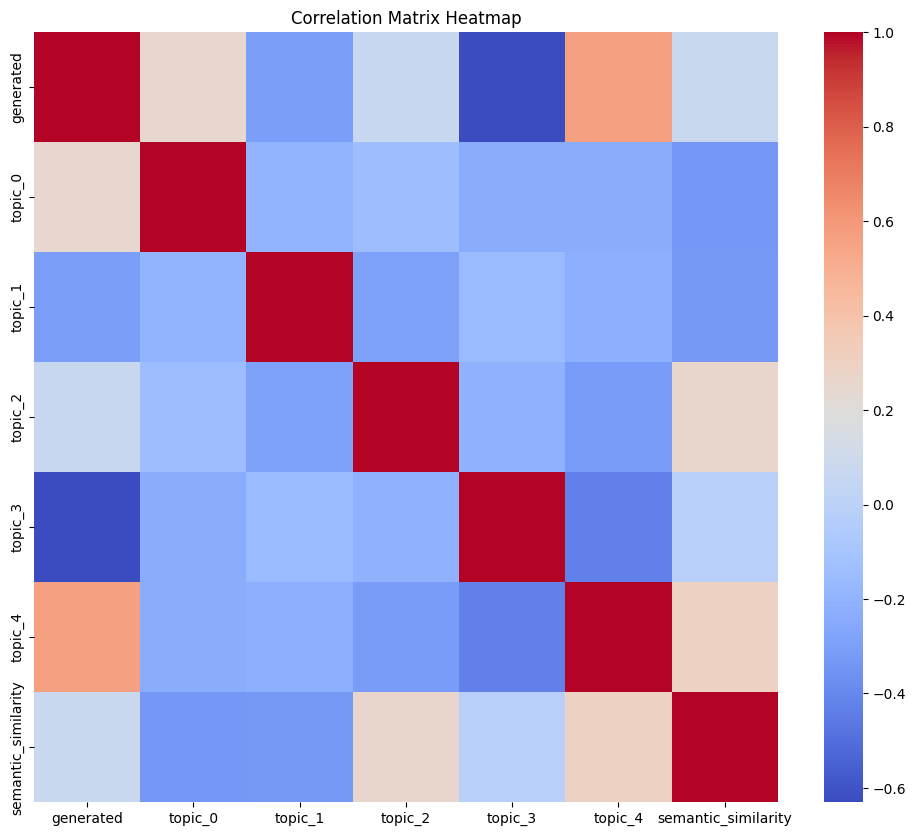


Correlation with 'generated' column:
 generated              1.000000
topic_4                0.560874
topic_0                0.251052
semantic_similarity    0.073016
topic_2                0.062740
topic_1               -0.300702
topic_3               -0.629974
Name: generated, dtype: float64


In [108]:
# Calculate the correlation matrix with only numeric columns
numeric_ext_df= external_df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_ext_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm")
plt.title("Correlation Matrix Heatmap")
plt.show()

# Display the correlation of all features with 'generated'
correlation_with_generated = correlation_matrix['generated'].sort_values(ascending=False)
print("\nCorrelation with 'generated' column:\n", correlation_with_generated)

In [109]:
external_df.to_csv('external_df.csv', index=False)

In [110]:
files.download('external_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>